In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
# Generate synthetic data for regression
X,y = make_regression(n_samples=500, n_features=1, n_targets=1, noise=30)

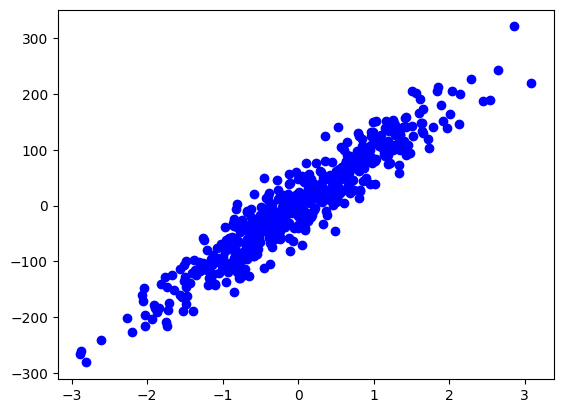

In [3]:
plt.scatter(X, y, color='blue')

In [4]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [5]:
from sklearn.linear_model import LinearRegression
# Initialize and train the Linear Regression model
lr = LinearRegression()

In [6]:
# Train the model
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[90.69058937]
0.3508805069196681


In [7]:
# Predict using the trained model
y_pred = lr.predict(X_test)
y_prediction = lr.predict(X)

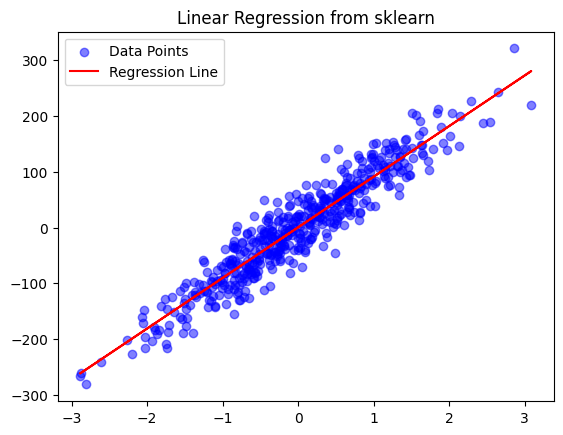

In [8]:
#plotting the regression line
plt.scatter(X, y, color='blue', alpha=0.5, label="Data Points")
plt.plot(X, y_prediction, color='red', label="Regression Line")
plt.title("Linear Regression from sklearn")
plt.legend()
plt.show()

In [9]:
# Evaluate performance
from sklearn.metrics import r2_score
print("r2 score of linear regression model : ", r2_score(y_test, y_pred))

r2 score of linear regression model :  0.8708290915633976


In [10]:
# Custom Gradient Descent Regressor model
class GradientDescentRegressor:
    def __init__(self, learning_rate, epochs):
        self.m = 0
        self.b = 0
        self.alpha = learning_rate
        self.epochs = epochs
    def fit(self, X, y):
        n = len(y)
        for i in range(self.epochs):
            slope_m = -2/n * np.sum((y - self.m * X.ravel() - self.b)*X.ravel())
            slope_b = -2/n * np.sum(y - self.m * X.ravel() - self.b)
            self.m = self.m - (self.alpha * slope_m)
            self.b = self.b - (self.alpha * slope_b)   
        print(self.m, self.b)
    def predict(self, X):
        return self.m * X + self.b

In [11]:
gdregressor = GradientDescentRegressor(0.01, 1000)

In [12]:
gdregressor.fit(X_train,y_train)

90.69058916148524 0.350880406868008


In [13]:
# Predict using the Gradient Descent model
y_pred_gdregressor = gdregressor.predict(X_test)
y_prediction_gdregressor = gdregressor.predict(X)

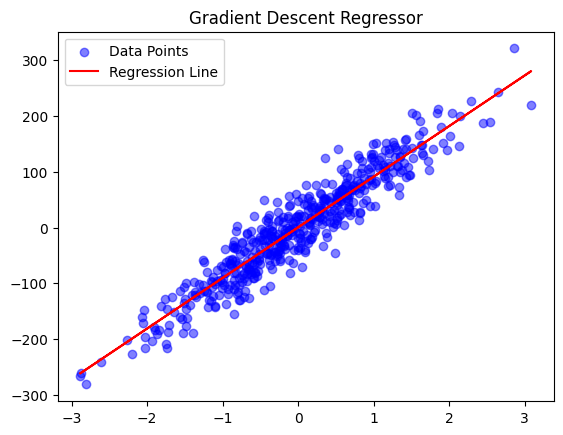

In [14]:
#plotting the regression line for the Gradient Descent model
plt.scatter(X, y, color='blue', alpha=0.5, label="Data Points")
plt.plot(X, y_prediction_gdregressor, color='red', label="Regression Line")
plt.title("Gradient Descent Regressor")
plt.legend()
plt.show()

In [15]:
# Evaluate performance
print("r2 score of Gradient Descent Regression Model :", r2_score(y_test, y_pred_gdregressor))

r2 score of Gradient Descent Regression Model : 0.870829091347986
